<a href="https://colab.research.google.com/github/caiobarretta/mineracao-twitter-covid-pnl/blob/master/1_TCC_Transforma%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação de dependencias/ setup inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install unidecode
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
usar_sample = False
valor_sample = 10000
global_random_state = 100
global_test_n_sample = 5
rodar_metodos_de_teste = True
habilita_wordcloud_textblob = True
habilita_wordcloud_textblob_TFIDF = True
habilita_wordcloud_lexico = True
habilita_wordcloud_lexico_TFIDF = True
habilita_wordcloud_Vader = True
habilita_wordcloud_Vader_TFIDF = True
habilita_wordcloud_LeIA = True
habilita_wordcloud_LeIA_TFIDF = True

exporta_dataframe_analise_sentimento_para_json = True

In [ ]:
caminho_dados = 'drive/MyDrive/Colab Notebooks'

# Importação dos dados

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json(f'{caminho_dados}/consolidado_part_0.json')
df.shape

(46303, 8)

Como escopo desse trabalho, o idioma selecionado sera o português.

In [ ]:
df = df.query("idioma == 'pt'")
df.head()

,id,texto,local,texto_tratado,idioma,texto_en,texto_wordcloud,src
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,pt,@defesagovbr orientafos not only attacking the...,orientafos nao so a atacar o proceso eleitor...,TWITTER
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,pt,rt @jairbolsonaro: - @minsaude converts one th...,: - o converte mil leitos de unidade de ...,TWITTER
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,pt,@caiovicentino video about digital certificate...,video sobre certificado digital para vacinad...,TWITTER
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,pt,"rt @outrasaude: read today's top health news, ...",: leia as principais noticias de saude de ho...,TWITTER
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,pt,rt @ericneuro: certain things are priceless......,: certas coisas nao tem preco... mas c bolso...,TWITTER


In [ ]:
if usar_sample:
  df = df.sample(n=valor_sample, random_state=global_random_state).copy()

In [ ]:
df['texto_tratado']

0         constante_nao_mencao_da_marca  orientafos nao...
1          constante_nao_mencao_da_marca : - o  constan...
2         constante_nao_mencao_da_marca  video sobre ce...
3          constante_nao_mencao_da_marca : leia as prin...
4          constante_nao_mencao_da_marca : certas coisa...
                               ...                        
46293    pandemia causou-desemprego- ansiedades-depresa...
46294    concupiscencia? a concupsencia e uma expresao ...
46298    boa tarde, lucas! estou otimista em relacao ao...
46299    excelente mestre peninha ! o noso maior proble...
46301    o que mais me asusta, e que minha irma, nao sa...
Name: texto_tratado, Length: 44508, dtype: object

## Funções básicas de manipulação data frame

In [ ]:
def existe_coluna_data_frame(df, nome_coluna):
  return nome_coluna in df

def teste_existe_coluna_data_frame():
  existe_coluna_data_frame(df, 'text')

if rodar_metodos_de_teste:
  teste_existe_coluna_data_frame()

In [ ]:
def agrupa_dataframe(df, col_src):
  if type(col_src) is list:
    return df.groupby(col_src)
  return df.groupby([col_src])

def teste_agrupa_dataframe():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state, replace=True).copy()
  df_agrupado = agrupa_dataframe(df_teste, 'local')
  for key, df_grupo in df_agrupado:
    print(key, df_grupo.shape)

def teste_agrupa_dataframe_list():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state, replace=True).copy()
  df_agrupado = agrupa_dataframe(df_teste, ['local', 'idioma'])
  for key, df_grupo in df_agrupado:
    print(key, df_grupo.shape)

if rodar_metodos_de_teste:
  teste_agrupa_dataframe()
  teste_agrupa_dataframe_list()

 (3, 8)
Rio de Janeiro, Brasil (1, 8)
São Paulo, Brasil (1, 8)
('', 'pt') (3, 8)
('Rio de Janeiro, Brasil', 'pt') (1, 8)
('São Paulo, Brasil', 'pt') (1, 8)


In [ ]:
def exporta_dataframe_para_json(df, filename):
  df.to_json(f"{caminho_dados}/{filename}.json")

def teste_exporta_dataframe_para_json():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state, replace=True).copy()
  exporta_dataframe_para_json(df_teste, "df_teste")

if rodar_metodos_de_teste:
  teste_exporta_dataframe_para_json()

## Verificação do corpus

Verificando algumas palavras a serem removidas do corpus.
Essas correções são aplicadas nas classes de tratamento de texto.

In [ ]:
def analisa_corpus_str_contains(df, palavras_para_analise, col_src, col_view, sample_count=1):
  for palavra in palavras_para_analise:
    df_analise_corpus = df.query(f'{col_src}.str.contains("{palavra}")', engine='python')
    print(f"Pesquisa: {palavra}|{col_src}|{col_view}")
    if len(df_analise_corpus):
      print(f"Quantidade total de ocorrências: {len(df_analise_corpus)}")
      df_analise_corpus = df_analise_corpus.sample(n=sample_count, random_state=global_random_state, replace=True)
      for i in range(0, sample_count):
        print("-------------------------------------------------------------------------------------")
        if type(col_view) is list:
          for view in col_view:
            print(f"'{df_analise_corpus.iloc[i][view]}'")
        else:
          print(f"'{df_analise_corpus.iloc[i][col_view]}'")
        print("-------------------------------------------------------------------------------------")
    else:
      print("Nenhum resultado foi encontrado.")

In [ ]:
analisa_corpus_str_lst = ['htps','hps', 'ttps', 'htt', 'https', 'http/', ' rt ', ' .com ', ' .com.br ', '@gmail', 'gmail', 'www', ' p ']
analisa_corpus_str_contains(df, analisa_corpus_str_lst, col_src='texto_wordcloud', col_view=['id', 'texto_wordcloud'], sample_count=1)

Pesquisa: htps|texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa: hps|texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa: ttps|texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa: htt|texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa: https|texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa: http/|texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa:  rt |texto_wordcloud|['id', 'texto_wordcloud']
Nenhum resultado foi encontrado.
Pesquisa:  .com |texto_wordcloud|['id', 'texto_wordcloud']
Quantidade total de ocorrências: 137
-------------------------------------------------------------------------------------
'1523483469149782016'
'  :       com pazuelo em mesmo em pandemia batemos record em transplantes pelo sus! so...'
--------------------------------------------------------------------------

## Função que analisa uma amostra de um data frame

In [ ]:
def analisa_amostra_data_frame(df, view, sample_count):
  df_sampled = df.sample(n=sample_count, random_state=global_random_state, replace=True)
  for i in range(0, len(df_sampled)):
    print("-------------------------------------------------------------------------------------")
    print(f"'{df_sampled.iloc[i][view]}'")
    print("-------------------------------------------------------------------------------------")

# APLICAÇÃO DOS MÉTODOS DE ANÁLISE DE SENTIMENTOS

## Análise de sentimentos TextBlob

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

### Análise de sentimentos

In [ ]:
def analisa_sentimento_df_textBlob(df, col_src):
  new_df = pd.DataFrame()
  sentimento_analisado_polaridade_lst = []
  sentimento_analisado_subjetividade_lst = []
  texto_lst = []
  for texto in df[col_src]:
    texto_lst.append(texto)
    analise = TextBlob(texto).sentiment
    # Polarity is a value between [-1.0, 1.0] and tells how positive or negative the text is.
    sentimento_analisado_polaridade_lst.append(analise.polarity)
    # Subjectivity is within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
    sentimento_analisado_subjetividade_lst.append(analise.subjectivity)
  new_df['texto'] = texto_lst
  new_df['polaridade'] = sentimento_analisado_polaridade_lst
  new_df['subjetividade'] = sentimento_analisado_subjetividade_lst
  return new_df

def test_analisa_sentimento_df_textBlob():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  new_df = analisa_sentimento_df_textBlob(df_teste, 'texto_en')
  print(df_teste)
  print(new_df)

#Teste analisa_sentimento_df_textBlob
if rodar_metodos_de_teste:
  test_analisa_sentimento_df_textBlob()

                        id                                              texto  \
8606   1527808472389140480  RT @HenriqueFontana: Depois do bolsolão da vac...   
19692  1533635054584442881  RT @BrazilFight: MÔNICA BERGAMO \n"Lula e Janj...   
10809  1529094354412916736  RT @desmentindobozo: Um general da ATIVA assum...   
41202  1554867976838549505  @nathy_ess Quando eu fiz a prova tinha que ser...   
15188  1529545073641283591  RT @renancalheiros: Se o SUS cobrasse “de quem...   

                   local                                      texto_tratado  \
8606              him/he    constante_nao_mencao_da_marca : depois do bo...   
19692     Recife, Brasil    constante_nao_mencao_da_marca  e janja testa...   
10809                       constante_nao_mencao_da_marca : um general d...   
41202  Barreiras, Brasil   constante_nao_mencao_da_marca  quando eu fiz ...   
15188                       constante_nao_mencao_da_marca : se o sus cob...   

      idioma                          

In [ ]:
df_textBlob = analisa_sentimento_df_textBlob(df.dropna(), 'texto_en')
df_textBlob.head()

,texto,polaridade,subjetividade
0,@defesagovbr orientafos not only attacking the...,0.300000,1.000000
1,rt @jairbolsonaro: - @minsaude converts one th...,-0.142857,0.357143
2,@caiovicentino video about digital certificate...,-0.150000,0.200000
3,"rt @outrasaude: read today's top health news, ...",0.250000,0.250000
4,rt @ericneuro: certain things are priceless......,0.607143,0.785714


### Rotulacao de sentimentos

In [ ]:
def cria_rotulacao_de_sentimentos_textBlob(df, col_src_text, col_src_polarity):
  lst_label = []
  lst_text = []
  new_df = pd.DataFrame()
  for text, polarity in zip(df[col_src_text], df[col_src_polarity]):
    if polarity < 0:
      lst_label.append(-1)
    elif polarity == 0:
      lst_label.append(0)
    else:
      lst_label.append(1)
    lst_text.append(text)
  new_df['texto'] = lst_text
  new_df['rotulo'] = lst_label
  return new_df

def test_cria_rotulacao_de_sentimentos_textBlob():
  df_teste = df_textBlob.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  new_df = cria_rotulacao_de_sentimentos_textBlob(df_teste, 'texto', 'polaridade')
  print(df_teste)
  print(new_df)

if rodar_metodos_de_teste:
  test_cria_rotulacao_de_sentimentos_textBlob()

                                                   texto  polaridade  \
8616   rt @desmentindobozo: the bolsolao franchise co...    0.000000   
33203  rt @constant_alfanumerica : what now?! at the ...    0.000000   
18817  rt @brazilfight: monica bergamo\n"lula and jan...    0.181818   
18323  I've been waiting for constant_numerica hours ...    0.060000   
39029  rt @constant_alfanumerica : the coronavirus an...    0.000000   

       subjetividade  
8616        0.000000  
33203       0.000000  
18817       0.522727  
18323       0.513333  
39029       0.000000  
                                               texto  rotulo
0  rt @desmentindobozo: the bolsolao franchise co...       0
1  rt @constant_alfanumerica : what now?! at the ...       0
2  rt @brazilfight: monica bergamo\n"lula and jan...       1
3  I've been waiting for constant_numerica hours ...       1
4  rt @constant_alfanumerica : the coronavirus an...       0


In [ ]:
df_textBlob_rotulado = cria_rotulacao_de_sentimentos_textBlob(df_textBlob, 'texto', 'polaridade')

df_rotulado_utilizando_textBlob = df.copy().dropna()
del df_rotulado_utilizando_textBlob['texto_en']
del df_rotulado_utilizando_textBlob['idioma']
df_rotulado_utilizando_textBlob['classe'] = df_textBlob_rotulado['rotulo']
df_rotulado_utilizando_textBlob.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,orientafos nao so a atacar o proceso eleitor...,TWITTER,1.0
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,-1.0
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,video sobre certificado digital para vacinad...,TWITTER,-1.0
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,: leia as principais noticias de saude de ho...,TWITTER,1.0
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,1.0


### Separação das classes (positivo = 1, neutro  = 0, negativo = -1)

In [ ]:
df_rotulado_utilizando_textBlob_positivo = df_rotulado_utilizando_textBlob.query("classe == 1")
df_rotulado_utilizando_textBlob_positivo.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,orientafos nao so a atacar o proceso eleitor...,TWITTER,1.0
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,: leia as principais noticias de saude de ho...,TWITTER,1.0
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,1.0
5,1518555194199613441,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,1.0
6,1518564691500572676,RT @ericneuro: Certas coisas não tem preço… Ma...,"Santo André, Brasil",constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,1.0


In [ ]:
df_rotulado_utilizando_textBlob_neutro = df_rotulado_utilizando_textBlob.query("classe == 0")
df_rotulado_utilizando_textBlob_neutro.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
20,1518613997016297476,Bolsonaro mandou o SUS cuidar de idosos com co...,"São Paulo, Brasil",bolsonaro mandou o sus cuidar de idosos com co...,bolsonaro mandou o sus cuidar de idosos com co...,TWITTER,0.0
21,1518614161126797315,RT @DayseDeLuta: Bolsonaro mandou o SUS cuidar...,,constante_nao_mencao_da_marca : bolsonaro ma...,: bolsonaro mandou o sus cuidar de idosos co...,TWITTER,0.0
22,1518615277872857088,RT @DayseDeLuta: Bolsonaro mandou o SUS cuidar...,Terra Redonda,constante_nao_mencao_da_marca : bolsonaro ma...,: bolsonaro mandou o sus cuidar de idosos co...,TWITTER,0.0
23,1518615480499589120,RT @DayseDeLuta: Bolsonaro mandou o SUS cuidar...,"Goiânia, Goiás",constante_nao_mencao_da_marca : bolsonaro ma...,: bolsonaro mandou o sus cuidar de idosos co...,TWITTER,0.0
24,1518615575915909124,RT @DayseDeLuta: Bolsonaro mandou o SUS cuidar...,"Santa Catarina, Brasil",constante_nao_mencao_da_marca : bolsonaro ma...,: bolsonaro mandou o sus cuidar de idosos co...,TWITTER,0.0


In [ ]:
df_rotulado_utilizando_textBlob_negativo = df_rotulado_utilizando_textBlob.query("classe == -1")
df_rotulado_utilizando_textBlob_negativo.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,-1.0
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,video sobre certificado digital para vacinad...,TWITTER,-1.0
9,1518576825584308226,"RT @mqueiroga2: Com a força do nosso #SUS, o B...",Cascavel - Paraná,constante_nao_mencao_da_marca : com a forca ...,": com a forca do noso , o brasil esta vence...",TWITTER,-1.0
11,1518583855631982593,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...","maringá, parana",constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,-1.0
13,1518587043785367553,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,-1.0


In [ ]:
print("positvos: ", len(df_rotulado_utilizando_textBlob_positivo))
print("neutros: ", len(df_rotulado_utilizando_textBlob_neutro))
print("negativos: ", len(df_rotulado_utilizando_textBlob_negativo))

positvos:  17034
neutros:  20322
negativos:  6938


### Análise de textos classificados pelo TextBlob

#### Análise de alguns texto classificados como positivos pelo TextBlob

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_textBlob_positivo, "texto", global_test_n_sample)

-------------------------------------------------------------------------------------
'RT @Jouberth19: MÔNICA BERGAMO: 

"Lula e Janja testam positivo para Covid. Casal foi ao hospital Sírio Libanês para fazer exames."

CADÊ O…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @SilvieBA: @diogomainardi Eu já o teria prendido na Pandemia por crimes contra a Saúde Pública'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @MarcosR12402270: EU TOMEI IVERMECTINA E ESTOU VIVO
E agora ?!  No congresso mundial de medicina realizado em Brasília, o SUS apresentou…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'Baricitinib

#### Análise de alguns texto classificados como neutro pelo TextBlob

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_textBlob_neutro, "texto", 20)

-------------------------------------------------------------------------------------
'RT @oatila: Cobrar mensalidade do SUS? Depois do país ter como política negar vacinas e enganar as pessoas para se infectarem em uma pandem…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @taoquei1: Nine com covid: Sírio libanês pra mim e SUS pra você que ostenta  2 tvs em casa sem nenhuma necessidade, acima do padrão Euro…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @Jouberth19: MÔNICA BERGAMO: 

"Lula e Janja testam positivo para Covid. Casal foi ao hospital Sírio Libanês para fazer exames."

CADÊ O…'
-------------------------------------------------------------------------------------
-------------------------------------------------------

#### Análise de alguns texto classificados como negativo pelo TextBlob

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_textBlob_negativo, "texto", 20)

-------------------------------------------------------------------------------------
'@desmentindobozo Tivemos a maior média de mortes por covid do planeta. No auge da pandemia um general que confessou não saber como funcionava o SUS foi alçado a ministro da saúde. O plano era que o vírus criasse a imunidade. O plano era deixar morrer.'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @AGarciaS1611: @LulaOficial É impressionante a capacidade de mentir desse senhor.
Primeiro vetou 5 vacinas importante para as famílias d…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'A luta de Biden contra o COVID-19 está de alguma forma sendo considerada um bom sinal, mas não é

Apesar da forma como a grande mídia classificou o diagnóstico de Joe Biden

## Análise de sentimentos baseada em léxico

### Lista de palavras positivas

In [ ]:
analise_lexico_palavras_positivas = ['abençoado','abençoar','abertura','abnegação','abraço','abrigo','absoluto','abundância','ação','aceitação','aceitar','acessível','aclamação','aclamado','aconchegante','aconchegar','aconchego','acreditar','adaptabilidade','adaptável','adequado','admiração','admirável','adoração','adorar','adorável','afabilidade','afável','afirmação','afirmativo','agilidade','agradar','agradável','agradecer','agradecimento','ajuda','ajudar','alcançar','alegre','alegria','alicerce','alma','altruísmo','altruísta','amabilidade','amar','amável','amigo','amizade','amor','amoroso','amor-próprio','animação','apaixonado','aplaudir','aplauso','apoiar','apoio','apreciado','apreciar','aprender','aprendizagem','aprovação','arte','assertividade','assertivo','astúcia','astucioso','atenção','atencioso','atitude','ativo','atração','auspicioso','autenticidade','autêntico','autoconfiança','autoestima','autonomia','autônomo','aventura','balanceado','batalhador','batalhar','beijar','beijo','beldade','beleza','belo','bem-disposto','bem-educado','bem-estar','bem-humorado','bem-vindo','bênção','bendito','beneficência','beneficente','benefício','benéfico','benemérito','benevolência','benevolente','benfeitor','benignidade','benzer','bom','bonança','bondade','bondoso','bonito','bravura','brilhante','brilhar','brilho','brincadeira','brincalhão','brincar','brio','brioso','calma','calor','camaradagem','capacidade','caridade','carinho','carinhoso','carismático','caritativo','cativar','cavalheiro','ceder','celebração','celestial','centrado','certeza','certo','céu','civilidade','civilizado','clarividência','claro','clemência','coerente','colaboração','colaborar','comemorar','compaixão','companheirismo','companheiro','companhia','compassivo','competência','competente','compreender','compreensão','comprometimento','comunhão','comunicação','comunidade','concentração','concordar','conectar','conexão','confiabilidade','confiança','confiante','confiável','confortável','conforto','congruência','conhecimento','conquista','conquistar','consciência','consciente','conseguir','consideração','consolação','consolo','construir','construtivo','contentamento','contente','continuidade','contribuição','contribuir','contributo','convicção','cooperação','cooperar','coração','coragem','corajoso','cordial','cordialidade','cortês','cortesia','credibilidade','crença','crescer','crescimento','criar','criatividade','criativo','cuidado','cuidadoso','cuidar','cultivar','cultura','cumpridor','cura','curiosidade','decência','decente','decoro','dedicação','dedicado','deferência','delicadeza','delicado','delícia','delicioso','denodo','desafio','descansar','descoberta','desejável','desejo','desenvoltura','desenvolver','desenvolvimento','deslumbrado','deslumbrar','destemido','destino','determinação','determinado','deus','dever','devotado','dignidade','digno','diligência','diligente','dinamismo','direção','dirigir','disciplina','disciplinado','discrição','disponibilidade','disponível','disposição','disposto','diversão','diversidade','divertido','divinal','divino','docilidade','educação','educado','educar','eficácia','eficiência','eficiente','elegância','elevação','elevado','elevar','elogio','eloquência','emancipação','emancipado','embelezar','eminência','emoção','empatia','empático','empenho','empolgação','empolgar','empreendedor','empreendedorismo','encantado','encanto','encorajador','encorajar','energia','enfático','engenho','enorme','entender','entendimento','entusiasmo','envolver','envolvimento','equânime','equanimidade','equidade','equilibrado','equilíbrio','equipe','equitativo','esclarecido','escolha','escrúpulo','especial','esperança','espírito','espiritualidade','estabilidade','estimular','estímulo','estudioso','estudo','estupendo','eternidade','eterno','evolução','evoluir','exaltação','exatidão','excelência','excelente','excepcional','exemplar','exemplo','expansivo','expressão','expressividade','êxtase','extraordinário','extrovertido','exultante','fabuloso','façanha','facilidade','fama','família','famoso','fantasia','fantástico','fascinado','fascinante','fascínio','favorito','fé','felicidade','felicitação','feliz','felizmente','fenomenal','fera','fértil','festa','festivo','fiabilidade','fidedignidade','fidedigno','fidelidade','fiel','filantropia','filantropo','fino','firme','firmeza','flexibilidade','foco','força','formoso','fortalecer','fortaleza','franco','franqueza','fraternidade','frontal','frontalidade','fruição','fruir','fulcral','fundamental','futuro','galã','gana','ganhar','garra','generosidade','generoso','gênese','genial','genialidade','gênio','gentil','gentileza','gentilmente','genuinamente','genuinidade','genuíno','gerar','germinar','gigante','gigantesco','glamoroso','glamour','global','globalidade','glória','glorificar','glorioso','gostar','gosto','gostoso','graça','graciosidade','gracioso','grande','grandeza','grandiosidade','gratidão','gratificante','gratífico','grato','guerreiro','guia','hábil','habilidade','harmonia','harmonioso','harmonizar','hegemonia','herói','heroico','heroísmo','higidez','hilariante','hilaridade','hilário','história','holístico','hombridade','honestidade','honesto','honorífico','honra','honrado','honroso','hospitaleiro','hospitalidade','humanidade','humanitário','humano','humildade','humilde','humor','ideal','idealismo','idealista','ideia','idílico','igualdade','iluminação','iluminado','imaculado','imaginação','imensidão','imenso','iminência','imortalidade','impagável','impavidez','impávido','imperturbável','importância','importante','importar','imprescindível','impressionante','inacreditável','incentivar','incentivo','inclusão','incomparável','incondicional','incrível','independência','independente','inesquecível','infinidade','infinito','influência','iniciar','iniciativa','inocente','inovação','inspiração','inspirado','inspirar','integridade','íntegro','inteiro','intelectualidade','inteligência','inteligente','intenção','interessado','interessante','interesse','intervenção','intervir','intrepidez','intrínseco','intuição','intuitivo','invencível','investimento','invicto','invulnerabilidade','janota','jeitoso','jocoso','joia','jovem','jovial','jovialidade','jubilante','jubilar','jubileu','júbilo','jubiloso','jucundidade','jucundo','juntar','junto','justiça','justiceiro','justo','juvenil','juventude','leal','lealdade','legal','legitimidade','legítimo','leve','leveza','lhaneza','lhano','liberal','liberdade','libertação','libertador','liberto','lícito','líder','liderança','lídimo','limpeza','límpido','limpo','lindeza','lindo','lisonja','lisonjeado','lisonjear','lisonjeiro','lisura','livre','livremente','longânime','longevidade','louvável','louvor','lucidez','lúcido','lúdico','lutador','luz','maduro','magia','mágico','magnânimo','magnificência','magnificente','magnífico','magno','majestade','majestoso','maneiro','maravilha','maravilhoso','marcante','maturidade','meigo','meiguice','melhor','melhorar','melhoria','memorável','merecedor','merecer','mérito','mestre','mestria','mesura','milagre','milagroso','miraculoso','misericórdia','misericordioso','modéstia','modesto','moral','moralidade','motivação','motivador','mudança','namorado','namoramento','namorar','namoriscar','namoro','nascer','nascimento','natal','natalício','natividade','nato','natural','naturalidade','naturalmente','natureza','ninho','nirvana','nitente','nitidamente','nitidez','nítido','nobre','nobreza','normal','normalidade','normalmente','norte','notabilidade','notadamente','notável','nova','novidade','novo','nutrido','nutrir','nutritivo','obediência','obediente','objetividade','objetivo','obrigado','obséquio','obsequioso','odisseia','operacional','operante','oportunidade','oportunizar','oportuno','ordem','organização','organizado','orgulho','orgulhoso','orientação','orientado','orientar','original','originalidade','otimismo','otimista','otimização','otimizar','ótimo','ousadia','ousado','pacato','paciência','paciente','pacificar','pacífico','paixão','paz','perdão','perdoar','perdurar','perfeição','perfeito','perseverança','perseverante','perseverar','persistência','persistente','persistir','perspectiva','perspicácia','perspicaz','piedade','piedoso','plenitude','poder','poderoso','poesia','polidez','polido','pontualidade','por favor','positividade','positivo','possibilidade','possível','potencial','praticidade','prazer','precisão','preciso','preferir','preparado','presença','presente','preservação','preservar','prestável','presteza','prestigioso','primoroso','proatividade','prodígio','prodigioso','proeminência','proeza','profissionalismo','progresso','promoção','promover','prontidão','prosperar','prosperidade','próspero','proteção','proteger','pureza','purificar','puro','qualidade','qualificação','qualificado','qualificar','quente','querença','querência','querençoso','querer','querido','querubim','questionador','questionar','quiescente','quieto','quietude','quimera','quimérico','química','quinta-essência','quintessência','racional','racionalidade','radiante','razão','real','realidade','realista','realização','realizado','realizar','recomeço','reconciliação','reconfortante','reconhecimento','recordação','reflexão','refrescado','rejuvenescer','rejuvenescido','relação','renascer','renascido','renovado','renovar','repouso','reputação','requintado','resiliência','resiliente','resistência','resistente','resoluto','resolvido','respeitado','respeitar','respeitável','respeito','respeitoso','resplandecer','responsabilidade','responsável','retidão','revelação','reverência','revigorado','revigorar','rezar','riqueza','rir','risada','riso','risonho','romance','romântico','sabedoria','sábio','sagacidade','sagaz','sagrado','santidade','santo','sapiência','satisfação','satisfeito','saudade','saudável','saúde','sedutor','segredo','segurança','seguro','sensacional','sensatez','sensato','sensibilidade','sensibilizar','sentimento','ser','serenidade','sereno','sério','significativo','sim','simpatia','simpático','simples','simplicidade','simplificar','sinceridade','sinergia','singularidade','sintonia','sistematização','solicitude','solidariedade','solidário','sonhador','sonho','sororidade','sorridente','sorrir','sorriso','sorte','sossegar','sossego','suave','sublime','sucesso','superação','superado','surpreendente','surpreender','surpreendido','surpresa','talento','talentoso','tato','temperança','tenacidade','tenaz','terno','ternura','ternurento','tesouro','tolerância','tolerante','tolerar','total','totalidade','trabalhador','trabalho','tradição','tranquilidade','tranquilizar','tranquilo','transcendental','transcendente','transformação','transformador','transformar','transigência','transparência','transparente','traquejo','trato','trégua','tremendo','triunfal','triunfante','triunfo','unânime','unanimidade','união','único','unidade','unido','unificação','unificador','unificar','uniforme','uniformidade','unissonante','uníssono','universal','universalidade','universo','unívoco','uno','urbanidade','urbano','útil','utilidade','utopia','utópico','valente','valentia','válido','valioso','valor','valorização','valoroso','vantagem','vantajoso','vencedor','vencer','veneração','venerar','venerável','ventura','venturoso','veracidade','verdade','verdadeiro','verídico','verossímil','versatilidade','viável','vibrante','vida','vigor','virtude','virtuoso','visionário','vistoso','vital','vitalidade','vitória','vitorioso','vivacidade','viver','vivo','vocação','vontade','xodó','xará','zéfiro','zelação','zelar','zelo','zelosia','zeloso','zen','zênite','zina','zínia','zoofilia','zumbaia']

### Lista de palavras negativas

In [ ]:
analise_lexico_palavras_negativas = ['ainda não','de modo algum','de jeito nenhum','de forma alguma','em hipotese alguma','já não','jamais','nada','não','nenhures','nunca','nao... mais','nem','nem mesmo','nem ao menos','nem... sequer','nenhum(a)','ninguém','nunca','nunca mais','quanto mais','tão pouco','não quero']

### Tratamento textual

#### Remoção de caracteres unicode.

In [ ]:
from unidecode import unidecode

def strip_unicode(texto):
  return unidecode(texto)

if rodar_metodos_de_teste:
  strip_unicode('não')

In [ ]:
def strip_unicode_from_list(textos):
  textos_sem_unicode = []
  for texto in textos:
    textos_sem_unicode.append(unidecode(texto))
  return textos_sem_unicode

if rodar_metodos_de_teste:
  strip_unicode_from_list(['não', 'ninguém'])

### Rotulação

In [ ]:
analise_lexico_palavras_positivas = strip_unicode_from_list(analise_lexico_palavras_positivas)
analise_lexico_palavras_negativas = strip_unicode_from_list(analise_lexico_palavras_negativas)

#### Aplicando no dataframe

In [ ]:
def retorna_analise_corpus_str_contains(df, palavras_para_analise, col_src, cols_results_name):
  cols_results = []
  for palavra in palavras_para_analise:
    df_analise_corpus = df.query(f'{col_src}.str.contains("{palavra}")', engine='python')
    if len(df_analise_corpus):
      for i in range(0, len(df_analise_corpus)):
        if type(cols_results_name) is list:
          col_results = []
          for view in cols_results_name:
            col_results.append(df_analise_corpus.iloc[i][view])
          cols_results.append(col_results)
        else:
          cols_results.append(df_analise_corpus.iloc[i][cols_results_name])
  return cols_results

def test_retorna_analise_corpus_str_contains():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  lst_teste = analise_lexico_palavras_positivas[0:100]
  results = retorna_analise_corpus_str_contains(df, lst_teste, 'texto_tratado', 'id')
  print('results:', len(results))

if rodar_metodos_de_teste:
  test_retorna_analise_corpus_str_contains()

results: 7121


In [ ]:
lexico_contendo_id_positivos = retorna_analise_corpus_str_contains(df.dropna(), analise_lexico_palavras_positivas, 'texto', 'id')
lexico_contendo_id_negativos = retorna_analise_corpus_str_contains(df.dropna(), analise_lexico_palavras_negativas, 'texto', 'id')
print("len(lexico_contendo_id_positivos):", len(lexico_contendo_id_positivos))
print("len(lexico_contendo_id_negativos):", len(lexico_contendo_id_negativos))

lexico_id_universo = list(df["id"].dropna())
lexico_id_positivos = list(set(lexico_contendo_id_positivos).difference(set(lexico_contendo_id_negativos)))
print("len(lexico_id_positivos):", len(lexico_id_positivos))

lexico_id_negativos = list(set(lexico_contendo_id_negativos).difference(set(lexico_contendo_id_positivos)))
print("len(lexico_id_negativos):", len(lexico_id_negativos))

lexico_id_neutros = list(set(lexico_contendo_id_positivos).intersection(set(lexico_contendo_id_negativos)))
print("len(lexico_id_neutros):", len(lexico_id_neutros))

#restante = list(((set(lexico_id_universo).difference(set(lexico_id_negativos))).difference(set(lexico_id_positivos))).difference(set(lexico_id_neutros)))
#lexico_id_neutros = lexico_id_neutros + restante
#print("len(lexico_id_neutros):", len(lexico_id_neutros))

print(len(lexico_id_positivos) + len(lexico_id_negativos) + len(lexico_id_neutros))
print("len(df):", len(df))

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expr.py:705: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return self.const_type(res(*new_args, **kwargs), self.env)


len(lexico_contendo_id_positivos): 53224
len(lexico_contendo_id_negativos): 5265
len(lexico_id_positivos): 30337
len(lexico_id_negativos): 4308
len(lexico_id_neutros): 703
35348
len(df): 44508


In [ ]:
def cria_rotulacao_de_sentimentos_analise_baseada_em_lexico(df, col_name_compare, id_classificados, valor_classe):
  lst_id = []
  lst_class = []
  lst_text = []
  new_data = {}
  df_search = df.query(f'{col_name_compare}=={id_classificados}')
  if len(df_search):
    for col in df.columns:
      new_data[col] = list()
    new_data['classe'] = list()
    for i in range(0, len(df_search)):
      for col in df.columns:
        new_data[col].append(df.iloc[i][col])
      new_data['classe'].append(valor_classe)
  new_df = pd.DataFrame(new_data)
  return new_df

def test_cria_rotulacao_de_sentimentos_analise_baseada_em_lexico():
  df_teste = df.sample(n=5, random_state=global_random_state).copy()
  lst_teste = lexico_id_positivos
  new_df = cria_rotulacao_de_sentimentos_analise_baseada_em_lexico(df_teste, 'id', lst_teste, 1)
  print(df_teste)
  print(new_df)

if rodar_metodos_de_teste:
  test_cria_rotulacao_de_sentimentos_analise_baseada_em_lexico()

                        id                                              texto  \
8606   1527808472389140480  RT @HenriqueFontana: Depois do bolsolão da vac...   
19692  1533635054584442881  RT @BrazilFight: MÔNICA BERGAMO \n"Lula e Janj...   
10809  1529094354412916736  RT @desmentindobozo: Um general da ATIVA assum...   
41202  1554867976838549505  @nathy_ess Quando eu fiz a prova tinha que ser...   
15188  1529545073641283591  RT @renancalheiros: Se o SUS cobrasse “de quem...   

                   local                                      texto_tratado  \
8606              him/he    constante_nao_mencao_da_marca : depois do bo...   
19692     Recife, Brasil    constante_nao_mencao_da_marca  e janja testa...   
10809                       constante_nao_mencao_da_marca : um general d...   
41202  Barreiras, Brasil   constante_nao_mencao_da_marca  quando eu fiz ...   
15188                       constante_nao_mencao_da_marca : se o sus cob...   

      idioma                          

#### Rotulando as classes no dataframe

In [ ]:
df_rotulado_utilizando_analise_baseada_em_lexico_positivo = cria_rotulacao_de_sentimentos_analise_baseada_em_lexico(df, 'id', lexico_id_positivos, 1)
df_rotulado_utilizando_analise_baseada_em_lexico_negativo = cria_rotulacao_de_sentimentos_analise_baseada_em_lexico(df, 'id', lexico_id_negativos, -1)
df_rotulado_utilizando_analise_baseada_em_lexico_neutro = cria_rotulacao_de_sentimentos_analise_baseada_em_lexico(df, 'id', lexico_id_neutros, 0)

print("positvos: ", len(df_rotulado_utilizando_analise_baseada_em_lexico_positivo))
print("neutros: ", len(df_rotulado_utilizando_analise_baseada_em_lexico_negativo))
print("negativos: ", len(df_rotulado_utilizando_analise_baseada_em_lexico_neutro))

positvos:  30337
neutros:  4308
negativos:  703


In [ ]:
df_rotulado_utilizando_analise_baseada_em_lexico_positivo.head()

,id,texto,local,texto_tratado,idioma,texto_en,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,pt,@defesagovbr orientafos not only attacking the...,orientafos nao so a atacar o proceso eleitor...,TWITTER,1
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,pt,rt @jairbolsonaro: - @minsaude converts one th...,: - o converte mil leitos de unidade de ...,TWITTER,1
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,pt,@caiovicentino video about digital certificate...,video sobre certificado digital para vacinad...,TWITTER,1
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,pt,"rt @outrasaude: read today's top health news, ...",: leia as principais noticias de saude de ho...,TWITTER,1
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,pt,rt @ericneuro: certain things are priceless......,: certas coisas nao tem preco... mas c bolso...,TWITTER,1


## Análise de sentimentos VADER

### Análise de sentimentos

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vaderSentimentIntensityAnalyzer = SentimentIntensityAnalyzer()

if rodar_metodos_de_teste:
  print(vaderSentimentIntensityAnalyzer.polarity_scores("I Love NPL!"))

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}


In [ ]:
def analisa_sentimento_df_Vader(df, col_src):
  new_df = pd.DataFrame()
  sentimento_analisado_compound_lst = []
  texto_lst = []
  for texto in df[col_src]:
    texto_lst.append(texto)
    analise = vaderSentimentIntensityAnalyzer.polarity_scores(texto)
    sentimento_analisado_compound_lst.append(analise["compound"])
  new_df['texto'] = texto_lst
  new_df['compound'] = sentimento_analisado_compound_lst
  return new_df

def test_analisa_sentimento_df_Vader():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  new_df = analisa_sentimento_df_Vader(df_teste, 'texto_en')
  print(df_teste)
  print(new_df)

#Teste analisa_sentimento_df_Vader
if rodar_metodos_de_teste:
  test_analisa_sentimento_df_Vader()

                        id                                              texto  \
8606   1527808472389140480  RT @HenriqueFontana: Depois do bolsolão da vac...   
19692  1533635054584442881  RT @BrazilFight: MÔNICA BERGAMO \n"Lula e Janj...   
10809  1529094354412916736  RT @desmentindobozo: Um general da ATIVA assum...   
41202  1554867976838549505  @nathy_ess Quando eu fiz a prova tinha que ser...   
15188  1529545073641283591  RT @renancalheiros: Se o SUS cobrasse “de quem...   

                   local                                      texto_tratado  \
8606              him/he    constante_nao_mencao_da_marca : depois do bo...   
19692     Recife, Brasil    constante_nao_mencao_da_marca  e janja testa...   
10809                       constante_nao_mencao_da_marca : um general d...   
41202  Barreiras, Brasil   constante_nao_mencao_da_marca  quando eu fiz ...   
15188                       constante_nao_mencao_da_marca : se o sus cob...   

      idioma                          

In [ ]:
df_Vader = analisa_sentimento_df_Vader(df.dropna(), 'texto_en')
df_Vader.head()

,texto,compound
0,@defesagovbr orientafos not only attacking the...,0.6111
1,rt @jairbolsonaro: - @minsaude converts one th...,0.5719
2,@caiovicentino video about digital certificate...,-0.2960
3,"rt @outrasaude: read today's top health news, ...",0.2023
4,rt @ericneuro: certain things are priceless......,-0.2003


### Rotulacao de sentimentos

In [ ]:
def cria_rotulacao_de_sentimentos_Vader(df, col_src_text, col_src_compound):
  lst_label = []
  lst_text = []
  new_df = pd.DataFrame()
  for text, compound in zip(df[col_src_text], df[col_src_compound]):
    if compound < 0:
      lst_label.append(-1)
    elif compound == 0:
      lst_label.append(0)
    else:
      lst_label.append(1)
    lst_text.append(text)
  new_df['texto'] = lst_text
  new_df['rotulo'] = lst_label
  return new_df

def test_cria_rotulacao_de_sentimentos_Vader():
  df_teste = df_Vader.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  new_df = cria_rotulacao_de_sentimentos_Vader(df_teste, 'texto', 'compound')
  print(df_teste)
  print(new_df)

if rodar_metodos_de_teste:
  test_cria_rotulacao_de_sentimentos_Vader()

                                                   texto  compound
8616   rt @desmentindobozo: the bolsolao franchise co...    0.1655
33203  rt @constant_alfanumerica : what now?! at the ...    0.0000
18817  rt @brazilfight: monica bergamo\n"lula and jan...    0.5574
18323  I've been waiting for constant_numerica hours ...   -0.5423
39029  rt @constant_alfanumerica : the coronavirus an...   -0.7959
                                               texto  rotulo
0  rt @desmentindobozo: the bolsolao franchise co...       1
1  rt @constant_alfanumerica : what now?! at the ...       0
2  rt @brazilfight: monica bergamo\n"lula and jan...       1
3  I've been waiting for constant_numerica hours ...      -1
4  rt @constant_alfanumerica : the coronavirus an...      -1


In [ ]:
df_Vader_rotulado = cria_rotulacao_de_sentimentos_Vader(df_Vader, 'texto', 'compound')

df_rotulado_utilizando_Vader = df.copy().dropna()
del df_rotulado_utilizando_Vader['texto_en']
del df_rotulado_utilizando_Vader['idioma']
df_rotulado_utilizando_Vader['classe'] = df_Vader_rotulado['rotulo']
df_rotulado_utilizando_Vader.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,orientafos nao so a atacar o proceso eleitor...,TWITTER,1.0
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,1.0
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,video sobre certificado digital para vacinad...,TWITTER,-1.0
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,: leia as principais noticias de saude de ho...,TWITTER,1.0
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0


### Separação das classes (positivo = 1, neutro  = 0, negativo = -1)

In [ ]:
df_rotulado_utilizando_Vader_positivo = df_rotulado_utilizando_Vader.query("classe == 1")
df_rotulado_utilizando_Vader_positivo.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,orientafos nao so a atacar o proceso eleitor...,TWITTER,1.0
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,1.0
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,: leia as principais noticias de saude de ho...,TWITTER,1.0
9,1518576825584308226,"RT @mqueiroga2: Com a força do nosso #SUS, o B...",Cascavel - Paraná,constante_nao_mencao_da_marca : com a forca ...,": com a forca do noso , o brasil esta vence...",TWITTER,1.0
11,1518583855631982593,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...","maringá, parana",constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,1.0


In [ ]:
df_rotulado_utilizando_Vader_neutro = df_rotulado_utilizando_Vader.query("classe == 0")
df_rotulado_utilizando_Vader_neutro.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
32,1518653341689126912,@nicolaskasprzak @contagemcorona1 @MiguelNicol...,São Paulo-capital,constante_nao_mencao_da_marca constante_nao...,estou no aguardo da liberacao da dose ...,TWITTER,0.0
34,1518660448924708873,RT @angelareppetto: @nicolaskasprzak @contagem...,"Porto Alegre, Brasil",constante_nao_mencao_da_marca : constante_n...,: estou no aguardo da liberacao da d...,TWITTER,0.0
36,1518673293787738113,@DeraMamma @FernandoHortaOf @STF_oficial Gel l...,São Paulo,constante_nao_mencao_da_marca constante_nao...,gel lubrificante o sus e todos os hospit...,TWITTER,0.0
37,1518674178840408065,@DeraMamma @FernandoHortaOf @STF_oficial Vc so...,São Paulo,constante_nao_mencao_da_marca constante_nao...,vc soube da pandemia de covid? soube que...,TWITTER,0.0
49,1518704688912285705,Único requisito é ter o Cartão SUS vinculado a...,"Bahia, Brasil",unico requisito e ter o cartao sus vinculado a...,unico requisito e ter o cartao sus vinculado a...,TWITTER,0.0


In [ ]:
df_rotulado_utilizando_Vader_negativo = df_rotulado_utilizando_Vader.query("classe == -1")
df_rotulado_utilizando_Vader_negativo.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,video sobre certificado digital para vacinad...,TWITTER,-1.0
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0
5,1518555194199613441,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0
6,1518564691500572676,RT @ericneuro: Certas coisas não tem preço… Ma...,"Santo André, Brasil",constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0
7,1518571301652344833,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0


In [ ]:
print("positvos: ", len(df_rotulado_utilizando_Vader_positivo))
print("neutros: ", len(df_rotulado_utilizando_Vader_neutro))
print("negativos: ", len(df_rotulado_utilizando_Vader_negativo))

positvos:  14270
neutros:  11791
negativos:  18233


### Análise de textos classificados pelo Vader

#### Análise de alguns texto classificados como positivos pelo Vader

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_Vader_positivo, "texto", 20)

-------------------------------------------------------------------------------------
'RT @BrazilFight: MÔNICA BERGAMO 
"Lula e Janja testam positivo para Covid.
Casal foi ao hospital Sírio Libanês para fazer exames."
VIVA O S…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @BrazilFight: MÔNICA BERGAMO 
"Lula e Janja testam positivo para Covid.
Casal foi ao hospital Sírio Libanês para fazer exames."
VIVA O S…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @LulaOficial: Sem o SUS e seus trabalhadores e trabalhadoras, o saldo da Covid teria sido ainda mais trágico. Mesmo sem o apoio do atual…'
-------------------------------------------------------------------------------------
-------------------------------------------------------

#### Análise de alguns texto classificados como neutro pelo Vader

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_Vader_neutro, "texto", 20)

-------------------------------------------------------------------------------------
'Servidores do INSS retornam ao trabalho presencial

Eles estavam em trabalho remoto por conta da emergência de saúde pública decorrente da pandemia da Covid-19

Foto: Di... 
https://t.co/sWOF3dWUac https://t.co/IYivGj8bgU'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @taoquei1: Nine com covid: Sírio libanês pra mim e SUS pra você que ostenta  2 tvs em casa sem nenhuma necessidade, acima do padrão Euro…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @erikakokay: “A pandemia mostrou a grandeza do SUS”, Lula.'
-------------------------------------------------------------------------------------
-----------------------------------------------------

#### Análise de alguns texto classificados como negativo pelo Vader

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_Vader_negativo, "texto", 20)

-------------------------------------------------------------------------------------
'RT @oatila: Cobrar mensalidade do SUS? Depois do país ter como política negar vacinas e enganar as pessoas para se infectarem em uma pandem…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @Clauwild1: O coronavírus e a guerra na Ucrânia não resolveram. A OMS declarou que a varíola do macaco “representa uma emergência de saú…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @silviogrimaldo: Pessoas triplamente vacinadas contra a covid-19 estão morrendo mais de problemas respiratórios do que as não vacinadas.…'
-------------------------------------------------------------------------------------
-------------------------------------------------------

## Análise de sentimentos LeIA

### Análise de sentimentos LeIA

In [ ]:
import subprocess

leIA_file = 'leia.py'
url = f"https://raw.githubusercontent.com/rafjaa/LeIA/master/{leIA_file}"
!wget --no-cache --backups=1 {url}
subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)

LeIA_negate_file = 'negate.txt'
url = f"https://raw.githubusercontent.com/rafjaa/LeIA/master/lexicons/{LeIA_negate_file}"
!wget -P lexicons/ --no-cache --backups=1 {url}
subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)

LeIA_booster_file = 'booster.txt'
url = f"https://raw.githubusercontent.com/rafjaa/LeIA/master/lexicons/{LeIA_booster_file}"
!wget -P lexicons/ --no-cache --backups=1 {url}
subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)

LeIA_vader_lexicon_ptbr_file = 'vader_lexicon_ptbr.txt'
url = f"https://raw.githubusercontent.com/rafjaa/LeIA/master/lexicons/{LeIA_vader_lexicon_ptbr_file}"
!wget -P lexicons/ --no-cache --backups=1 {url}
subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)

LeIA_emoji_utf8_lexicon_ptbr_file = 'emoji_utf8_lexicon_ptbr.txt'
url = f"https://raw.githubusercontent.com/rafjaa/LeIA/master/lexicons/{LeIA_emoji_utf8_lexicon_ptbr_file}"
!wget -P lexicons/ --no-cache --backups=1 {url}
subprocess.run(["wget", "--no-cache", "--backups=1", url], stderr=subprocess.PIPE, stdout=subprocess.PIPE)

from leia import SentimentIntensityAnalyzer 

leIASentimentIntensityAnalyzer = SentimentIntensityAnalyzer()

if rodar_metodos_de_teste:
  # Análise de texto simples
  leIASentimentIntensityAnalyzer.polarity_scores('Eu estou feliz')

--2022-10-31 03:32:44--  https://raw.githubusercontent.com/rafjaa/LeIA/master/leia.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18515 (18K) [text/plain]
Saving to: ‘leia.py’

leia.py             100%[===================>]  18.08K  --.-KB/s    in 0.001s  

2022-10-31 03:32:45 (14.7 MB/s) - ‘leia.py’ saved [18515/18515]

--2022-10-31 03:32:45--  https://raw.githubusercontent.com/rafjaa/LeIA/master/lexicons/negate.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 493 [text/plain]
Saving to: ‘lexicons/negate.txt’

negate.txt  

In [ ]:
def analisa_sentimento_df_LeIA(df, col_src):
  new_df = pd.DataFrame()
  sentimento_analisado_compound_lst = []
  texto_lst = []
  for texto in df[col_src]:
    texto_lst.append(texto)
    analise = leIASentimentIntensityAnalyzer.polarity_scores(texto)
    sentimento_analisado_compound_lst.append(analise["compound"])
  new_df['texto'] = texto_lst
  new_df['compound'] = sentimento_analisado_compound_lst
  return new_df

def test_analisa_sentimento_df_LeIA():
  df_teste = df.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  new_df = analisa_sentimento_df_LeIA(df_teste, 'texto')
  print(df_teste)
  print(new_df)

if rodar_metodos_de_teste:
  #Teste analisa_sentimento_df_LeIA
  test_analisa_sentimento_df_LeIA()

                        id                                              texto  \
8606   1527808472389140480  RT @HenriqueFontana: Depois do bolsolão da vac...   
19692  1533635054584442881  RT @BrazilFight: MÔNICA BERGAMO \n"Lula e Janj...   
10809  1529094354412916736  RT @desmentindobozo: Um general da ATIVA assum...   
41202  1554867976838549505  @nathy_ess Quando eu fiz a prova tinha que ser...   
15188  1529545073641283591  RT @renancalheiros: Se o SUS cobrasse “de quem...   

                   local                                      texto_tratado  \
8606              him/he    constante_nao_mencao_da_marca : depois do bo...   
19692     Recife, Brasil    constante_nao_mencao_da_marca  e janja testa...   
10809                       constante_nao_mencao_da_marca : um general d...   
41202  Barreiras, Brasil   constante_nao_mencao_da_marca  quando eu fiz ...   
15188                       constante_nao_mencao_da_marca : se o sus cob...   

      idioma                          

In [ ]:
df_LeIA = analisa_sentimento_df_LeIA(df.dropna(), 'texto')
df_LeIA.head()

,texto,compound
0,@DefesaGovBr Orientafos não só a atacar o proc...,-0.6597
1,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",-0.1531
2,@caiovicentino Video sobre Certificado digital...,-0.7096
3,RT @outrasaude: Leia as principais notícias de...,0.0000
4,RT @ericneuro: Certas coisas não tem preço… Ma...,-0.2244


### Rotulacao de sentimentos

In [ ]:
def cria_rotulacao_de_sentimentos_LeIA(df, col_src_text, col_src_compound):
  lst_label = []
  lst_text = []
  new_df = pd.DataFrame()
  for text, compound in zip(df[col_src_text], df[col_src_compound]):
    if compound <= -0.05:
      lst_label.append(-1)
    elif compound >= 0.05:
      lst_label.append(1)
    else:
      lst_label.append(0)
    lst_text.append(text)
  new_df['texto'] = lst_text
  new_df['rotulo'] = lst_label
  return new_df

def test_cria_rotulacao_de_sentimentos_LeIA():
  df_teste = df_LeIA.sample(n=global_test_n_sample, random_state=global_random_state).copy()
  new_df = cria_rotulacao_de_sentimentos_LeIA(df_teste, 'texto', 'compound')
  print(df_teste)
  print(new_df)

if rodar_metodos_de_teste:
  test_cria_rotulacao_de_sentimentos_LeIA()

                                                   texto  compound
8616   RT @desmentindobozo: A franquia BOLSOLÃO segue...    0.0000
33203  RT @claudiovarella1: E agora ?!  No congresso ...    0.4926
18817  RT @BrazilFight: MÔNICA BERGAMO \n"Lula e Janj...    0.7125
18323  Estou a 3 horas aguardando pra resolver a ques...   -0.6597
39029  RT @Clauwild1: O coronavírus e a guerra na Ucr...   -0.8020
                                               texto  rotulo
0  RT @desmentindobozo: A franquia BOLSOLÃO segue...       0
1  RT @claudiovarella1: E agora ?!  No congresso ...       1
2  RT @BrazilFight: MÔNICA BERGAMO \n"Lula e Janj...       1
3  Estou a 3 horas aguardando pra resolver a ques...      -1
4  RT @Clauwild1: O coronavírus e a guerra na Ucr...      -1


In [ ]:
df_LeIA_rotulado = cria_rotulacao_de_sentimentos_LeIA(df_LeIA, 'texto', 'compound')

df_rotulado_utilizando_LeIA = df.copy().dropna()
del df_rotulado_utilizando_LeIA['texto_en']
del df_rotulado_utilizando_LeIA['idioma']
df_rotulado_utilizando_LeIA['classe'] = df_LeIA_rotulado['rotulo']
df_rotulado_utilizando_LeIA.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,orientafos nao so a atacar o proceso eleitor...,TWITTER,-1.0
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,-1.0
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,video sobre certificado digital para vacinad...,TWITTER,-1.0
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,: leia as principais noticias de saude de ho...,TWITTER,0.0
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0


### Separação das classes (positivo = 1, neutro  = 0, negativo = -1)

In [ ]:
df_rotulado_utilizando_LeIA_positivo = df_rotulado_utilizando_LeIA.query("classe == 1")
df_rotulado_utilizando_LeIA_positivo.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
9,1518576825584308226,"RT @mqueiroga2: Com a força do nosso #SUS, o B...",Cascavel - Paraná,constante_nao_mencao_da_marca : com a forca ...,": com a forca do noso , o brasil esta vence...",TWITTER,1.0
35,1518668185955938307,"RT @mqueiroga2: Com a força do nosso #SUS, o B...",Campo Grande - MS,constante_nao_mencao_da_marca : com a forca ...,": com a forca do noso , o brasil esta vence...",TWITTER,1.0
41,1518682855169212418,"Olha, SINCERAMENTE, se eu tiver que fazer mais...",,"olha, sinceramente, se eu tiver que fazer mais...","olha, sinceramente, se eu tiver que fazer mais...",TWITTER,1.0
42,1518686529438339077,"Presidente @jairbolsonaro, tenho uma grande no...","Minas Gerais, Brasil","presidente constante_nao_mencao_da_marca , te...","presidente , tenho uma grande noticia para o ...",TWITTER,1.0
46,1518690380023275521,Meu avô tomou a 4ª da vacina contra o corona. ...,"Manaus, Brasil",meu avo tomou a constante_alfanumerica da va...,meu avo tomou a da vacina contra o corona. b...,TWITTER,1.0


In [ ]:
df_rotulado_utilizando_LeIA_neutro = df_rotulado_utilizando_LeIA.query("classe == 0")
df_rotulado_utilizando_LeIA_neutro.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
3,1518544088668254208,RT @outrasaude: Leia as principais notícias de...,,constante_nao_mencao_da_marca : leia as prin...,: leia as principais noticias de saude de ho...,TWITTER,0.0
17,1518596599101992962,💁🏽‍♀️ O Point da vacina na Feira da Av. Santan...,"Santana, Brasil",o point da vacina na feira da av. santana ta d...,o point da vacina na feira da av. santana ta d...,TWITTER,0.0
20,1518613997016297476,Bolsonaro mandou o SUS cuidar de idosos com co...,"São Paulo, Brasil",bolsonaro mandou o sus cuidar de idosos com co...,bolsonaro mandou o sus cuidar de idosos com co...,TWITTER,0.0
21,1518614161126797315,RT @DayseDeLuta: Bolsonaro mandou o SUS cuidar...,,constante_nao_mencao_da_marca : bolsonaro ma...,: bolsonaro mandou o sus cuidar de idosos co...,TWITTER,0.0
22,1518615277872857088,RT @DayseDeLuta: Bolsonaro mandou o SUS cuidar...,Terra Redonda,constante_nao_mencao_da_marca : bolsonaro ma...,: bolsonaro mandou o sus cuidar de idosos co...,TWITTER,0.0


In [ ]:
df_rotulado_utilizando_LeIA_negativo = df_rotulado_utilizando_LeIA.query("classe == -1")
df_rotulado_utilizando_LeIA_negativo.head()

,id,texto,local,texto_tratado,texto_wordcloud,src,classe
0,1518530758926815232,@DefesaGovBr Orientafos não só a atacar o proc...,"Camaçari, Bahia.",constante_nao_mencao_da_marca orientafos nao...,orientafos nao so a atacar o proceso eleitor...,TWITTER,-1.0
1,1518533559614640129,"RT @jairbolsonaro: - O @minsaude converte 6,4 ...",,constante_nao_mencao_da_marca : - o constan...,: - o converte mil leitos de unidade de ...,TWITTER,-1.0
2,1518542410002968583,@caiovicentino Video sobre Certificado digital...,,constante_nao_mencao_da_marca video sobre ce...,video sobre certificado digital para vacinad...,TWITTER,-1.0
4,1518551681440567296,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0
5,1518555194199613441,RT @ericneuro: Certas coisas não tem preço… Ma...,,constante_nao_mencao_da_marca : certas coisa...,: certas coisas nao tem preco... mas c bolso...,TWITTER,-1.0


In [ ]:
print("positvos: ", len(df_rotulado_utilizando_LeIA_positivo))
print("neutros: ", len(df_rotulado_utilizando_LeIA_neutro))
print("negativos: ", len(df_rotulado_utilizando_LeIA_negativo))

positvos:  16806
neutros:  6653
negativos:  20835


### Análise de textos classificados pelo LeIA

#### Análise de alguns texto classificados como positivos pelo LeIA

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_LeIA_positivo, "texto", 20)

-------------------------------------------------------------------------------------
'RT @BrazilFight: MÔNICA BERGAMO 
"Lula e Janja testam positivo para Covid.
Casal foi ao hospital Sírio Libanês para fazer exames."
VIVA O S…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @claudiovarella1: E agora ?!  No congresso mundial de medicina realizado em Brasília, o SUS apresentou um estudo em que mostra que a INV…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'@rosiepatrocinio Não sabia que o sus tava proibindo.
Na maternidade aqui ao lado sempre entrou, mesmo durante à pandemia.
Na época ainda faziam partos pelo sus, ai a gestante sempre podiam levar UMA pessoa, mas levava. 
Porém, triste demais pq tem muitas gestantes que não tem quem l

#### Análise de alguns texto classificados como neutro pelo LeIA

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_LeIA_neutro, "texto", 20)

-------------------------------------------------------------------------------------
'Covid 19 aumenta chance de AVC, Demência de Alzheimer e Parkinson. Use Máscara. Evite Aglomerações. Tome Vacina.https://t.co/JeX7lHvvmU #Saúde #SaúdePública #PromoçãodaSaúde #SaúdedaFamília #SUS #Pandemia #Coronavírus #Jornalismo #Ciência #Medicina #Infectologia #Imunologia #OMS https://t.co/fik08IFuSq'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @DeputadoFederal: O SUS, que é exemplo mundial em saúde pública e que salvou milhares de vidas nesta pandemia, está recebendo um dos pio…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @ThiagoResiste: Pastores indicados pro Bolsonaro pediam propina a prefeitos, roubaram R$ 7 bilhões do SUS, desviaram 

#### Análise de alguns texto classificados como negativo pelo LeIA

In [ ]:
analisa_amostra_data_frame(df_rotulado_utilizando_LeIA_negativo, "texto", 20)

-------------------------------------------------------------------------------------
'RT @oatila: Cobrar mensalidade do SUS? Depois do país ter como política negar vacinas e enganar as pessoas para se infectarem em uma pandem…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @MarcosR12402270: EU TOMEI IVERMECTINA E ESTOU VIVO
E agora ?!  No congresso mundial de medicina realizado em Brasília, o SUS apresentou…'
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
'RT @LulaOficial: O principal problema que tivemos durante a pandemia foi ter um governo negacionista. Se não fosse a grandeza do SUS e dos…'
-------------------------------------------------------------------------------------
--------------------------------------------------------

# GERAÇÃO DE ARQUIVOS COM ANÁLISE DE SENTIMENTOS CLASSIFICADAS

## Exportação análise de sentimentos TextBlob

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_textBlob_positivo, "df_rotulado_utilizando_textBlob_positivo")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_textBlob_neutro, "df_rotulado_utilizando_textBlob_neutro")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_textBlob_negativo, "df_rotulado_utilizando_textBlob_negativo")

## Exportação análise de sentimentos baseada em léxico

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_analise_baseada_em_lexico_positivo, "df_rotulado_utilizando_analise_baseada_em_lexico_positivo")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_analise_baseada_em_lexico_neutro, "df_rotulado_utilizando_analise_baseada_em_lexico_neutro")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_analise_baseada_em_lexico_negativo, "df_rotulado_utilizando_analise_baseada_em_lexico_negativo")

## Exportação análise de sentimentos VADER

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_Vader_positivo, "df_rotulado_utilizando_Vader_positivo")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_Vader_neutro, "df_rotulado_utilizando_Vader_neutro")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_Vader_negativo, "df_rotulado_utilizando_Vader_negativo")

## Exportação análise de sentimentos LeIA

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_LeIA_positivo, "df_rotulado_utilizando_LeIA_positivo")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_LeIA_neutro, "df_rotulado_utilizando_LeIA_neutro")

In [ ]:
if exporta_dataframe_analise_sentimento_para_json:
  exporta_dataframe_para_json(df_rotulado_utilizando_LeIA_negativo, "df_rotulado_utilizando_LeIA_negativo")

# Comparação entre as análises de sentimentos

In [ ]:
qtd_textBlob_positivo = len(df_rotulado_utilizando_textBlob_positivo)
qtd_lexico_positivo = len(df_rotulado_utilizando_analise_baseada_em_lexico_positivo)
qtd_Vader_positivo = len(df_rotulado_utilizando_Vader_positivo)
qtd_LeIA_positivo = len(df_rotulado_utilizando_Vader_positivo)

qtd_textBlob_neutro = len(df_rotulado_utilizando_textBlob_neutro)
qtd_lexico_neutro = len(df_rotulado_utilizando_analise_baseada_em_lexico_neutro)
qtd_Vader_neutro = len(df_rotulado_utilizando_Vader_neutro)
qtd_LeIA_neutro = len(df_rotulado_utilizando_Vader_neutro)

qtd_textBlob_negativo = len(df_rotulado_utilizando_textBlob_negativo)
qtd_lexico_negativo = len(df_rotulado_utilizando_analise_baseada_em_lexico_negativo)
qtd_Vader_negativo = len(df_rotulado_utilizando_Vader_negativo)
qtd_LeIA_negativo = len(df_rotulado_utilizando_Vader_negativo)

print('Positivos TextBlob:', qtd_textBlob_positivo, 'Análise baseada em léxico:', qtd_lexico_positivo, 'Vader:', qtd_Vader_positivo, 'LeIA:', qtd_LeIA_positivo)
print('Neutros TextBlob:', qtd_textBlob_neutro, 'Análise baseada em léxico:', qtd_lexico_neutro, 'Vader:', qtd_Vader_neutro, 'LeIA:', qtd_LeIA_neutro)
print('Negativos TextBlob:', qtd_textBlob_negativo, 'Análise baseada em léxico:', qtd_lexico_negativo, 'Vader:', qtd_Vader_negativo, 'LeIA:', qtd_LeIA_negativo)

print('Total TextBlob:', qtd_textBlob_positivo + qtd_textBlob_neutro + qtd_textBlob_negativo)
print('Total Lexico:', qtd_lexico_positivo + qtd_lexico_neutro + qtd_lexico_negativo)
print('Total Vader:', qtd_Vader_positivo + qtd_Vader_neutro + qtd_Vader_negativo)
print('Total LeIA:', qtd_LeIA_positivo + qtd_LeIA_neutro + qtd_LeIA_negativo)
print('len(df):', len(df))

Positivos TextBlob: 17034 Análise baseada em léxico: 30337 Vader: 14270 LeIA: 14270
Neutros TextBlob: 20322 Análise baseada em léxico: 703 Vader: 11791 LeIA: 11791
Negativos TextBlob: 6938 Análise baseada em léxico: 4308 Vader: 18233 LeIA: 18233
Total TextBlob: 44294
Total Lexico: 35348
Total Vader: 44294
Total LeIA: 44294
len(df): 44508


In [ ]:
import matplotlib.pyplot as plt

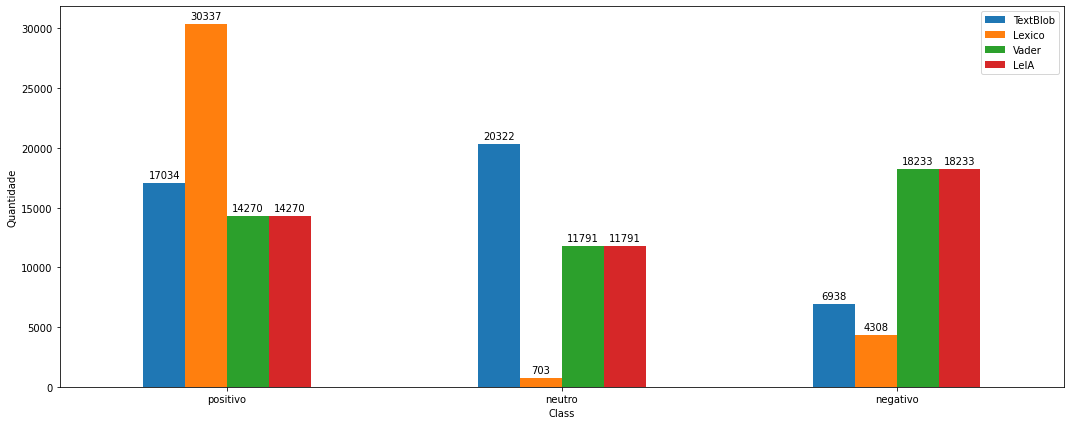

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

nomes_rotulos_analises_sentimentos =["positivo","neutro","negativo"]
dados_comparacao_analises_sentimentos={
    "TextBlob":[qtd_textBlob_positivo,qtd_textBlob_neutro,qtd_textBlob_negativo],
    "Lexico":[qtd_lexico_positivo,qtd_lexico_neutro,qtd_lexico_negativo],
    "Vader":[qtd_Vader_positivo,qtd_Vader_neutro,qtd_Vader_negativo],
    "LeIA":[qtd_LeIA_positivo,qtd_LeIA_neutro,qtd_LeIA_negativo],
}

df_comparacao_analises_sentimentos = pd.DataFrame(dados_comparacao_analises_sentimentos, index=nomes_rotulos_analises_sentimentos)

ax_comparacao_analises_sentimentos = df_comparacao_analises_sentimentos.plot(kind='bar', stacked=False, figsize=(18, 7), rot=0, xlabel='Class', ylabel='Quantidade')
for container in ax_comparacao_analises_sentimentos.containers:
    labels = [child.get_height() if child.get_height() > 0 else '' for child in container]
    ax_comparacao_analises_sentimentos.bar_label(container, labels=labels, label_type='edge', padding=3)


# Versões das bibliotecas Exportadas pelo pip

In [1]:
!pip freeze > requirements.txt



absl-py==1.3.0

aeppl==0.0.33

aesara==2.7.9

aiohttp==3.8.3

aiosignal==1.2.0

alabaster==0.7.12

albumentations==1.2.1

altair==4.2.0

appdirs==1.4.4

arviz==0.12.1

astor==0.8.1

astropy==4.3.1

astunparse==1.6.3

async-timeout==4.0.2

asynctest==0.13.0

atari-py==0.2.9

atomicwrites==1.4.1

attrs==22.1.0

audioread==3.0.0

autograd==1.5

Babel==2.10.3

backcall==0.2.0

beautifulsoup4==4.6.3

bleach==5.0.1

blis==0.7.9

bokeh==2.3.3

branca==0.5.0

bs4==0.0.1

CacheControl==0.12.11

cached-property==1.5.2

cachetools==4.2.4

catalogue==2.0.8

certifi==2022.9.24

cffi==1.15.1

cftime==1.6.2

chardet==3.0.4

charset-normalizer==2.1.1

click==7.1.2

clikit==0.6.2

cloudpickle==1.5.0

cmake==3.22.6

cmdstanpy==1.0.8

colorcet==3.0.1

colorlover==0.3.0

community==1.0.0b1

confection==0.0.3

cons==0.4.5

contextlib2==0.5.5

convertdate==2.4.0

crashtest==0.3.1

crcmod==1.7

cufflinks==0.17.3

cvxopt==1.3.0

cvxpy==1.2.1

cycler==0.11.0

cymem==2.0.7

Cython==0.29.32

daft==0.0.4

dask==2022.2.0

datascience==0.17.5

debugpy==1.0.0

decorator==4.4.2

defusedxml==0.7.1

descartes==1.1.0

dill==0.3.6

distributed==2022.2.0

dlib==19.24.0

dm-tree==0.1.7

dnspython==2.2.1

docutils==0.17.1

dopamine-rl==1.0.5

earthengine-api==0.1.329

easydict==1.10

ecos==2.0.10

editdistance==0.5.3

en-core-web-sm @ https://github.com/explosion/spacy-models/releases/download/

en_core_web_sm-3.4.1/en_core_web_sm-3.4.1-py3-none-any.whl

entrypoints==0.4

ephem==4.1.3

et-xmlfile==1.1.0

etils==0.8.0

etuples==0.3.8

fa2==0.3.5

fastai==2.7.9

fastcore==1.5.27

fastdownload==0.0.7

fastdtw==0.3.4

fastjsonschema==2.16.2

fastprogress==1.0.3

fastrlock==0.8

feather-format==0.4.1

filelock==3.8.0

firebase-admin==4.4.0

fix-yahoo-finance==0.0.22

Flask==1.1.4

flatbuffers==1.12

folium==0.12.1.post1

frozenlist==1.3.1

fsspec==2022.10.0

future==0.16.0

gast==0.4.0

GDAL==2.2.2

gdown==4.4.0

gensim==3.6.0

geographiclib==1.52

geopy==1.17.0

gin-config==0.5.0

glob2==0.7

google==2.0.3

google-api-core==1.31.6

google-api-python-client==1.12.11

google-auth==1.35.0

google-auth-httplib2==0.0.4

google-auth-oauthlib==0.4.6

google-cloud-bigquery==1.21.0

google-cloud-bigquery-storage==1.1.2

google-cloud-core==1.0.3

google-cloud-datastore==1.8.0

google-cloud-firestore==1.7.0

google-cloud-language==1.2.0

google-cloud-storage==1.18.1

google-cloud-translate==1.5.0

google-colab @ file:///colabtools/dist/google-colab-1.0.0.tar.gz

google-pasta==0.2.0

google-resumable-media==0.4.1

googleapis-common-protos==1.56.4

googledrivedownloader==0.4

graphviz==0.10.1

greenlet==1.1.3.post0

grpcio==1.50.0

gspread==3.4.2

gspread-dataframe==3.0.8

gym==0.25.2

gym-notices==0.0.8

h5py==3.1.0

HeapDict==1.0.1

hijri-converter==2.2.4

holidays==0.16

holoviews==1.14.9

html5lib==1.0.1

httpimport==0.5.18

httplib2==0.17.4

httplib2shim==0.0.3

httpstan==4.6.1

humanize==0.5.1

hyperopt==0.1.2

idna==2.10

imageio==2.9.0

imagesize==1.4.1

imbalanced-learn==0.8.1

imblearn==0.0

imgaug==0.4.0

importlib-metadata==4.13.0

importlib-resources==5.10.0

imutils==0.5.4

inflect==2.1.0

intel-openmp==2022.2.0

intervaltree==2.1.0

ipykernel==5.3.4

ipython==7.9.0

ipython-genutils==0.2.0

ipython-sql==0.3.9

ipywidgets==7.7.1

itsdangerous==1.1.0

jax==0.3.23

jaxlib @ https://storage.googleapis.com/jax-releases/cuda11/jaxlib-0.3.22+cuda11.cudnn805-cp37-cp37m-manylinux2014_x86_64.whl

jieba==0.42.1

Jinja2==2.11.3

joblib==1.2.0

jpeg4py==0.1.4

jsonschema==4.3.3

jupyter-client==6.1.12

jupyter-console==6.1.0

jupyter-core==4.11.2

jupyterlab-widgets==3.0.3

kaggle==1.5.12

kapre==0.3.7

keras==2.9.0

Keras-Preprocessing==1.1.2

keras-vis==0.4.1

kiwisolver==1.4.4

korean-lunar-calendar==0.3.1

langcodes==3.3.0

libclang==14.0.6

librosa==0.8.1

lightgbm==2.2.3

llvmlite==0.39.1

lmdb==0.99

locket==1.0.0

logical-unification==0.4.5

LunarCalendar==0.0.9

lxml==4.9.1

Markdown==3.4.1

MarkupSafe==2.0.1

marshmallow==3.18.0

matplotlib==3.2.2

matplotlib-venn==0.11.7

miniKanren==1.0.3

missingno==0.5.1

mistune==0.8.4

mizani==0.7.3

mkl==2019.0

mlxtend==0.14.0

more-itertools==9.0.0

moviepy==0.2.3.5

mpmath==1.2.1

msgpack==1.0.4

multidict==6.0.2

multipledispatch==0.6.0

multitasking==0.0.11

murmurhash==1.0.9

music21==5.5.0

natsort==5.5.0

nbconvert==5.6.1

nbformat==5.7.0

netCDF4==1.6.1

networkx==2.6.3

nibabel==3.0.2

nltk==3.7

notebook==5.5.0

numba==0.56.3

numexpr==2.8.4

numpy==1.21.6

oauth2client==4.1.3

oauthlib==3.2.2

okgrade==0.4.3

opencv-contrib-python==4.6.0.66

opencv-python==4.6.0.66

opencv-python-headless==4.6.0.66

openpyxl==3.0.10

opt-einsum==3.3.0

osqp==0.6.2.post0

packaging==21.3

palettable==3.3.0

pandas==1.3.5

pandas-datareader==0.9.0

pandas-gbq==0.13.3

pandas-profiling==1.4.1

pandocfilters==1.5.0

panel==0.12.1

param==1.12.2

parso==0.8.3

partd==1.3.0

pastel==0.2.1

pathlib==1.0.1

pathy==0.6.2

patsy==0.5.3

pep517==0.13.0

pexpect==4.8.0

pickleshare==0.7.5

Pillow==7.1.2

pip-tools==6.2.0

plotly==5.5.0

plotnine==0.8.0

pluggy==0.7.1

pooch==1.6.0

portpicker==1.3.9

prefetch-generator==1.0.1

preshed==3.0.8

prettytable==3.4.1

progressbar2==3.38.0

promise==2.3

prompt-toolkit==2.0.10

prophet==1.1.1

protobuf==3.17.3

psutil==5.4.8

psycopg2==2.9.5

ptyprocess==0.7.0

py==1.11.0

pyarrow==6.0.1

pyasn1==0.4.8

pyasn1-modules==0.2.8

pycocotools==2.0.5

pycparser==2.21

pyct==0.4.8

pydantic==1.10.2

pydata-google-auth==1.4.0

pydot==1.3.0

pydot-ng==2.0.0

pydotplus==2.0.2

PyDrive==1.3.1

pyemd==0.5.1

pyerfa==2.0.0.1

Pygments==2.6.1

pygobject==3.26.1

pylev==1.4.0

pymc==4.1.4

PyMeeus==0.5.11

pymongo==4.3.2

pymystem3==0.2.0

PyOpenGL==3.1.6

pyparsing==3.0.9

pyrsistent==0.18.1

pysimdjson==3.2.0

pysndfile==1.3.8

PySocks==1.7.1

pystan==3.3.0

pytest==3.6.4

python-apt==0.0.0

python-dateutil==2.8.2

python-louvain==0.16

python-slugify==6.1.2

python-utils==3.3.3

pytz==2022.5

pyviz-comms==2.2.1

PyWavelets==1.3.0

PyYAML==6.0

pyzmq==23.2.1

qdldl==0.1.5.post2

qudida==0.0.4

regex==2022.6.2

requests==2.23.0

requests-oauthlib==1.3.1

resampy==0.4.2

rpy2==3.5.5

rsa==4.9

scikit-image==0.18.3

scikit-learn==1.0.2

scipy==1.7.3

screen-resolution-extra==0.0.0

scs==3.2.0

seaborn==0.11.2

Send2Trash==1.8.0

setuptools-git==1.2

Shapely==1.8.5.post1

six==1.15.0

sklearn-pandas==1.8.0

smart-open==5.2.1

snowballstemmer==2.2.0

sortedcontainers==2.4.0

soundfile==0.11.0

spacy==3.4.2

spacy-legacy==3.0.10

spacy-loggers==1.0.3

Sphinx==1.8.6

sphinxcontrib-serializinghtml==1.1.5

sphinxcontrib-websupport==1.2.4

SQLAlchemy==1.4.42

sqlparse==0.4.3

srsly==2.4.5

statsmodels==0.12.2

sympy==1.7.1

tables==3.7.0

tabulate==0.8.10

tblib==1.7.0

tenacity==8.1.0

tensorboard==2.9.1

tensorboard-data-server==0.6.1

tensorboard-plugin-wit==1.8.1

tensorflow==2.9.2

tensorflow-datasets==4.6.0

tensorflow-estimator==2.9.0

tensorflow-gcs-config==2.9.1

tensorflow-hub==0.12.0

tensorflow-io-gcs-filesystem==0.27.0

tensorflow-metadata==1.10.0

tensorflow-probability==0.16.0

termcolor==2.0.1

terminado==0.13.3

testpath==0.6.0

text-unidecode==1.3

textblob==0.15.3

thinc==8.1.5

threadpoolctl==3.1.0

tifffile==2021.11.2

toml==0.10.2

tomli==2.0.1

toolz==0.12.0

torch @ https://download.pytorch.org/whl/cu113/torch-1.12.1%2Bcu113-cp37-cp37m-linux_x86_64.whl

torchaudio @ https://download.pytorch.org/whl/cu113/torchaudio-0.12.1%2Bcu113-cp37-cp37m-linux_x86_64.whl

torchsummary==1.5.1

torchtext==0.13.1

torchvision @ https://download.pytorch.org/whl/cu113/torchvision-0.13.1%2Bcu113-cp37-cp37m-linux_x86_64.whl

tornado==5.1.1

tqdm==4.64.1

traitlets==5.1.1

tweepy==3.10.0

typeguard==2.7.1

typer==0.4.2

typing-extensions==4.1.1

tzlocal==1.5.1

uritemplate==3.0.1

urllib3==1.24.3

vega-datasets==0.9.0

wasabi==0.10.1

wcwidth==0.2.5

webargs==8.2.0

webencodings==0.5.1

Werkzeug==1.0.1

widgetsnbextension==3.6.1

wordcloud==1.8.2.2

wrapt==1.14.1

xarray==0.20.2

xarray-einstats==0.2.2

xgboost==0.90

xkit==0.0.0

xlrd==1.1.0

xlwt==1.3.0

yarl==1.8.1

yellowbrick==1.5

zict==2.2.0

zipp==3.10.0
